In [5]:
import math
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict

In [6]:
data_size = 4000
batch_size = 128

loss_history = pickle.load(open('../results/seq2seq/seq2seq_loss_history.pkl', 'rb'))
train_loss = loss_history['loss']
val_loss = loss_history['val_loss']

In [10]:
# Compute the number of batches per epoch
batches_per_epoch = math.ceil(data_size / batch_size)

# Reconstruct losses per epoch
train_losses_per_epoch = []
for start in range(0, len(train_loss), batches_per_epoch):
    sl = train_loss[start:start+batches_per_epoch]
    current_loss = sum(sl) / len(sl)
    train_losses_per_epoch.append(current_loss)

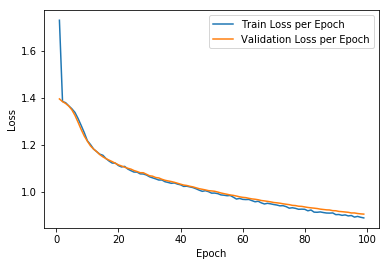

In [16]:
plt.plot(range(1, len(train_losses_per_epoch)), train_losses_per_epoch[:-1])
plt.plot(range(1, len(val_loss)), val_loss[:-1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss per Epoch', 'Validation Loss per Epoch'])
plt.show()